# Liquid Chromatography - Mass Spectrometry
## Learning Objectives
- Explain the fundamental principles of liquid chromatography and mass spectrometry as individual techniques and how they complement each other when combined.
- Compare and constrast a triple quadrupole mass spectrometer and a quadrupole - time-of-flight mass spectrometer in the context of LC-MS.
- Describe the key components of a LC-MS instrument, including injection systems, columns, interfaces, ionization sources, mass analyzers, and detectors.
- Describe the process of using reaction monitoring and data-dependent acquisition for LC-MS.
- Evaluate the advantages, limitations, and appropriate applications of LC-MS compared to other analytical techniques.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('plot.mplstyle')

## Liquid Chromatography

The *retention factor* in liquid chromatography is the ratio between the time that an analyte spends partitioned in the stationary phase to time that analyte spends in the liquid mobile phase. Therefore, the analyte must be stable as a solute during experiments.

### Reverse-Phase Liquid Chromatography

- Uses a nonpolar stationary phase and a polar mobile phase.
- Is the most-used type of chromatography for molecular applications.

#### Reflection Quation

1. A chemist is analyzing a mixture containing two pharmaceutical compounds using reverse-phase HPLC with a C18 column and a mobile phase consisting of 30% acetonitrile and 70% water (v/v).

![4-hydroxybenzamide](./images-lc-ms/4-hydroxybenzamide.png)

![4-butylbenzamide](./images-lc-ms/4-butylbenzamide.png)

Which compound (4-hydroxybenzamide or 4-butylbenzamide) would you expect to elute first from the reverse-phase column? Explain your reasoning based on the principles of reverse-phase chromatography and the molecular structures of these compounds. 


**Figure 2.** Examples of chromatograms with ($left$) no systematic or random errors, ($middle$) like the $left$ chromatogram with the addition of a systematic error, and ($right$) like the $middle$ chromatogram with the addition of random errors. 

## LC-MS

The eluent at any instant in time will be far simpler than the original sample prior to LC. In LC-MS experiments, a mass spectrometer is used to sample the eluent as a function of time. This is an example of orthogonal analysis; combining multiple analytical techniques with different principles of selectivity can yield far greater selectivity than a single technique on its own.

### Recall: Electrospray Ioniztion

![Diagram of electrospray ionization](https://upload.wikimedia.org/wikipedia/commons/d/d1/ESI_positive_mode_%2821589986840%29.jpg)  

**Figure 3.** Electrospray ionization in “positive ion mode”. The electrospray capillary is held at a high potential (typically 1-5 kV) relative to the atmospheric-pressure inlet of the mass spectrometer. Electrochemistry of the liquid sample results in the formation of excess charges. The coulombic repulsion of those excess charges overcomes the surface tension of the liquid, which results in the formation of a Taylor cone and the expulsion of highly charged droplets. Those droplets undergo desolvation and fission, which eventually results in the formation of gas-phase ions. [Figure Source](https://en.wikipedia.org/wiki/Electrospray_ionization). 

Electrospray ionization results in even-electron ions that are proton rich, e.g., $[M+H]^{+}$ or $[M+nH]^{+n}$ in positive mode, or proton deficient, e.g., $[M-H]^{-}$ or $[M-nH]^{-n}$ in negative mode. The formation of multiply charged ions is common for analytes with higher masses, e.g., synthetic polymers and proteins, whereas the formation of singly charged ions is common for small mocules.

## Targeted Versus Discovery LC-MS

### Targeted (Quantitative) LC-MS 
- Focuses on detecting and quantifying specific, predefined molecules
- Uses prior knowledge of analyte properties (mass, retention time, fragmentation patterns)
- Typically employs selected/multiple reaction monitoring (SRM/MRM)
- Offers high sensitivity and selectivity for known compounds
- Provides accurate quantification with broader dynamic range
- Requires method development for each target analyte

### Discovery (Qualitative) LC-MS:
- Aims to identify as many compounds as possible without (or with minimal) prior knowledge
- Typically uses data-dependent acquisition
- Often employs high-resolution mass analyzers (Orbitrap, TOF)
- Generates complex datasets requiring sophisticated informatics
- Better suited for identifying novel compounds and unexpected biomarkers
- Generally less sensitive than targeted methods for specific compounds

The key difference is their purpose: targeted LC-MS answers "how much of these specific compounds are present?" while discovery LC-MS answers "what compounds are present in this sample?" Targeted approaches provide better quantification for known analytes, while discovery approaches offer broader coverage for unknown compound identification.

## Targeted Analysis with a Triple Quadrupole Mass Analyzer

A triple quadrupole mass spectrometer consists of three quadrupoles arranged in sequence:

- **Q1**: The first quadrupole acts as a mass filter that selects precursor ions of specific m/z ratios from the ion source.
- **q2**: The second quadrupole functions as a collision cell where selected precursor ions undergo collision-induced dissociation (CID) with an inert gas (typically nitrogen or argon).
- **Q3**: The third quadrupole acts as another mass filter that selects specific fragment ions produced in q2 for detection.

This arrangement enables highly selective detection modes:

- **Selected Reaction Monitoring (SRM)**: Monitors a specific precursor-to-fragment transition
- **Multiple Reaction Monitoring (MRM)**: Monitors multiple transitions in rapid succession

Triple quadrupoles excel at targeted analysis with exceptional sensitivity and selectivity, making them ideal for quantitative applications in clinical diagnostics, forensics, food safety, and environmental monitoring. However, they typically offer lower resolution compared to other mass analyzers.

## Qualitative Analysis with a Quadropole - Time-of-Flight Mass Spectrometer

A QTOF mass spectrometer combines a quadrupole mass filter with a time-of-flight analyzer:

- Quadrupole (Q): Acts as a mass filter to select ions of interest or transmit all ions
- Collision Cell: Where ions undergo fragmentation (typically using collision-induced dissociation)
- Time-of-Flight (TOF): Separates ions based on their velocity in a flight tube, with lower $m/z$ ions reaching the detector faster than higher $m/z$ ions.

In discovery LC-MS, QTOF instruments for untargeted analysis are usually operated in data-dependent acquisition (DDA) mode, where the most abundant precursor ions are automatically selected for fragmentation. This allows comprehensive profiling of complex samples like biological fluids, tissue extracts, or environmental samples without extensive knowledge of their composition.

![dda-workflow](./images-lc-ms/dda.png)

**Figure 5.** Most LC-MS-MS experiments are performed using data-dependent acquisition. During the course of the LC separation, the mass spectrometer alternates between acquiring $MS^1$ spectra (a full spectrum of all molecular ions generated from the LC eluent) and $MS^2$ spectra of a predefined number of the most-intense peptide ions observed in the most-recent MS1 spectrum. In this hypothetical example, fragmentation spectra are measured for the five most-intense precursor ions identified during the preceding $MS^1$ spectrum. Usually, each mass spectrum is acquired in one second or less, so thousands of mass spectra are acquired during each LC-MS-MS experiment.




## Some Considerations for Quantitation
### Peak Heights and Peak Areas
- Both peak heights and peak areas are used for quantitation.
- Over the linear dynamic range of the method, ideally peak heights are proportional to peak area.
- Peaks areas are typically more accurate, but peak heights are less likely to be affected by interferences from neighboring peaks.

Text(0, 0.5, 'Signal')

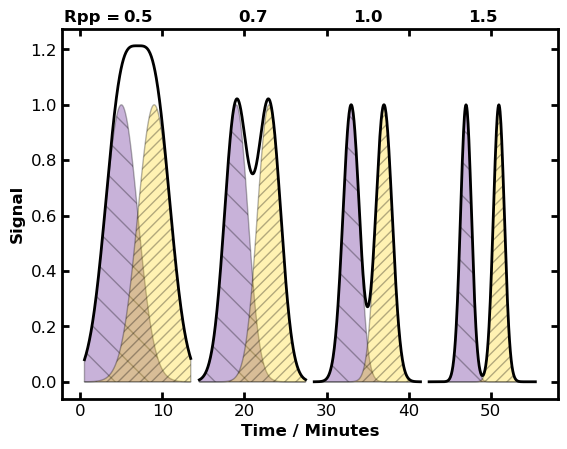

In [3]:
fig, ax = plt.subplots()

offset = 0.
t_A = 5
t_B = 9
Rpp = [0.5, 0.7, 1.0,1.5]

for i in range(4):
    
    s = 1/Rpp[i]
    
    time = np.arange(offset+0.5,offset+13.5,0.05)
    int_A = norm.pdf(time, offset+t_A,scale=s)
    int_A *= 1./int_A.max()
    int_B = norm.pdf(time, offset+t_B,scale=s)
    int_B *= 1./int_B.max()

    ax.fill_between(time,int_A,alpha=0.3,color='indigo',hatch='\\',edgecolor='black')
    ax.fill_between(time,int_B,alpha=0.3,color='gold',hatch='///',edgecolor='black')
    ax.plot(time, int_A+int_B,color="black")
    
    ax.text(offset+7, 1.3, str(Rpp[i]), fontweight='bold', horizontalalignment="center")
    offset += 14

ax.text(-2, 1.3, "Rpp = ", fontweight='bold')        
ax.set_xlabel('Time / Minutes', fontweight='bold')
ax.set_ylabel('Signal', fontweight='bold')

**Figure 1.** Examples of pairs of chromatographic peaks that have different peak-to-peak resolutions ($R_{pp}$). Note that most detectors would yield the black trace, with is the sum of the signals originating from the two components. At modest resolution ($R_{pp} \approx 0.7$), the heights of individual peaks can be measured with reasonable accuracy, whereas the areas of the individual peaks would have significant interference from the other component.

Text(0.5, 1.0, '+Noise')

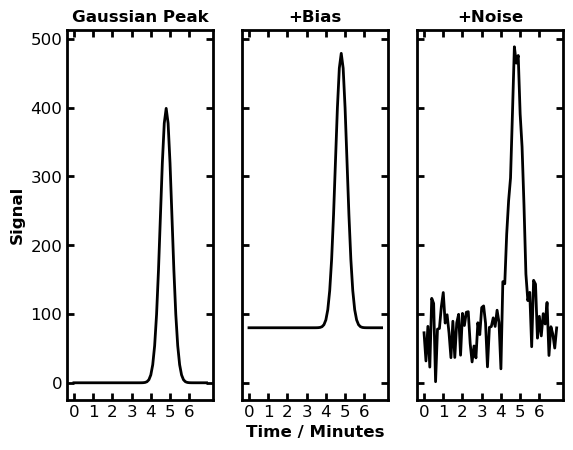

In [ ]:
fig, ax = plt.subplots(1, 3,sharey=True)

time = np.arange(0,7,0.1)
tr_drug = 4.8
int = np.zeros_like(time)
int += 50.*6.*norm.pdf(time, tr_drug,scale=0.3)
ax[0].plot(time,int,color='black')

int += 80
ax[1].plot(time,int,color='black')

int += 32.*np.random.randn(np.size(time))
ax[2].plot(time,int,color='black')

for i in range(3):
    ax[i].set_xticks(range(7))

ax[0].set_ylabel('Signal', fontweight='bold')
ax[1].set_xlabel('Time / Minutes', fontweight='bold')

ax[0].set_title('Gaussian Peak', fontweight='bold')
ax[1].set_title('+Bias', fontweight='bold')
ax[2].set_title('+Noise', fontweight='bold')